In [1]:
import pandas as pd
import numpy as np

# Data Preprocessing

In [2]:
# data source: http://archive.ics.uci.edu/ml/datasets/Adult

dfTrain = pd.read_csv('data/adult/adult.data',header=None, sep=',')
dfTest = pd.read_csv('data/adult/adult.test', header=None, sep=',', skiprows=[0])

# assign column names
dfTrain.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                   'relationship','race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                   'income']
dfTest.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 
                  'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                  'income']

print(dfTrain.shape)
print(dfTest.shape)

(32561, 15)
(16281, 15)


In [3]:
display(dfTrain)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
print(pd.unique(dfTrain['income']))
print(pd.unique(dfTest['income']))

print(pd.unique(dfTrain['workclass']))

print(pd.unique(dfTrain['native-country']))
print(pd.unique(dfTest['native-country']))

[' <=50K' ' >50K']
[' <=50K.' ' >50K.']
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
[' United-States' ' ?' ' Peru' ' Guatemala' ' Mexico'
 ' Dominican-Republic' ' Ireland' ' Germany' ' Philippines' ' Thailand'
 ' Haiti' ' El-Salvador' ' Puerto-Rico' ' Vietnam' ' South' ' Columbia'
 ' Japan' ' India' ' Cambodia' ' Poland' ' Laos' ' England' ' Cuba'
 ' Taiwan' ' Italy' ' Canada' ' Portugal' ' China' ' Ni

In [5]:
# Clean data
#Remove "." from income
dfTrain["income"] = dfTrain["income"].str.replace(".","",regex=True)
dfTest["income"] = dfTest["income"].str.replace(".","",regex=True)

# Remove question mark
dfTrain = dfTrain[(dfTrain.values !=' ?').all(axis=1)]
dfTest = dfTest[(dfTest.values !=' ?').all(axis=1)]

print(dfTrain.shape)
print(dfTest.shape)

(30162, 15)
(15060, 15)


In [6]:
print(pd.unique(dfTrain['income']))
print(pd.unique(dfTest['income']))

[' <=50K' ' >50K']
[' <=50K' ' >50K']


In [7]:
# Remove all continuous attributes: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week
dfTrain = dfTrain.drop(['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'], axis=1)
dfTest = dfTest.drop(['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'], axis=1)

# Encoder method 1: use one-hot encoder
def oneHotBind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[feature_to_encode])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop(feature_to_encode, axis=1)
    return(res)

dfTrain = oneHotBind(dfTrain,['workclass','education','marital-status','occupation',
                              'relationship','race','sex','native-country'])
dfTest  = oneHotBind(dfTest, ['workclass','education','marital-status','occupation',
                              'relationship','race','sex','native-country'])

# Add missing attributes
for attributes in dfTrain.keys():
    if attributes not in dfTest.keys():
        print("Adding missing feature {}".format(attributes))
        dfTest[attributes] = 0
        
print(dfTrain.shape)
print(dfTest.shape)

Adding missing feature native-country_ Holand-Netherlands
(30162, 99)
(15060, 99)


In [8]:
dfTrain.head(10)

,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,<=50K,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,<=50K,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,<=50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,<=50K,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,<=50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,<=50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,<=50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,>50K,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,>50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,>50K,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Train and test sets
X_train,Y_train = dfTrain.iloc[:,1:].values, dfTrain.iloc[:, 0].values
X_test,Y_test = dfTest.iloc[:, 1:].values, dfTest.iloc[:, 0].values

In [10]:
display(X_train)
display(Y_train)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Machine Learning: Decision trees

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
predictions = dtree.predict(X_test)

print("=======================================================")
print("Decision Tree Model:")
print("Accuracy: " + str(accuracy_score(Y_test, predictions)))
print("Confusion matrix:\n" + str(confusion_matrix(Y_test, predictions)))
print(classification_report(Y_test, predictions))

Decision Tree Model:
Accuracy: 0.8098273572377158
Confusion matrix:
[[10333  1027]
 [ 1837  1863]]
              precision    recall  f1-score   support

       <=50K       0.85      0.91      0.88     11360
        >50K       0.64      0.50      0.57      3700

    accuracy                           0.81     15060
   macro avg       0.75      0.71      0.72     15060
weighted avg       0.80      0.81      0.80     15060



In [12]:
from sklearn.tree import export_text

r = export_text(dtree)
print(r)

|--- feature_25 <= 0.50
|   |--- feature_17 <= 0.50
|   |   |--- feature_19 <= 0.50
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- feature_27 <= 0.50
|   |   |   |   |   |   |--- feature_56 <= 0.50
|   |   |   |   |   |   |   |--- feature_49 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_68 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 24
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_68 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class:  >50K
|   |   |   |   |   |   |   |   |--- feature_33 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_80 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_91 <= 0.50
|

In [13]:
print(dtree.get_n_leaves())

2790


# Machine Learning: Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, Y_train)
predictions = gnb.predict(X_test)

print("=======================================================")
print("Naive Bayes Model:")
print("Accuracy: " + str(accuracy_score(Y_test, predictions)))
print("Confusion matrix:\n" + str(confusion_matrix(Y_test, predictions)))
print(classification_report(Y_test, predictions))

Naive Bayes Model:
Accuracy: 0.74800796812749
Confusion matrix:
[[11136   224]
 [ 3571   129]]
              precision    recall  f1-score   support

       <=50K       0.76      0.98      0.85     11360
        >50K       0.37      0.03      0.06      3700

    accuracy                           0.75     15060
   macro avg       0.56      0.51      0.46     15060
weighted avg       0.66      0.75      0.66     15060



# Visualization
Iris dataset

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris(return_X_y=False)
X = iris.data
Y = iris.target
features = iris.feature_names
labels = iris.target_names
print(features)
print(labels)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=42)
print(X_train.shape, X_test.shape)

(90, 4) (60, 4)


10
|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- feature_1 <= 2.75
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  2.75
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



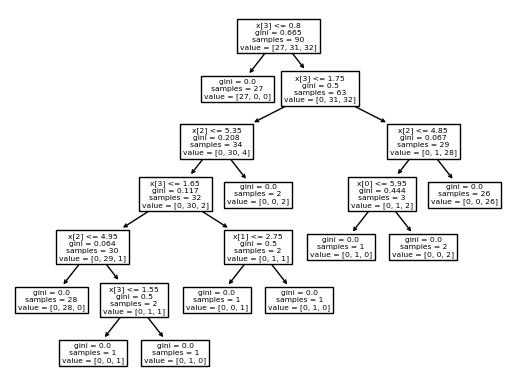

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
predictions = dtree.predict(X_test)
print(dtree.get_n_leaves())

r = tree.export_text(dtree)
print(r)

tree.plot_tree(dtree)
plt.show()

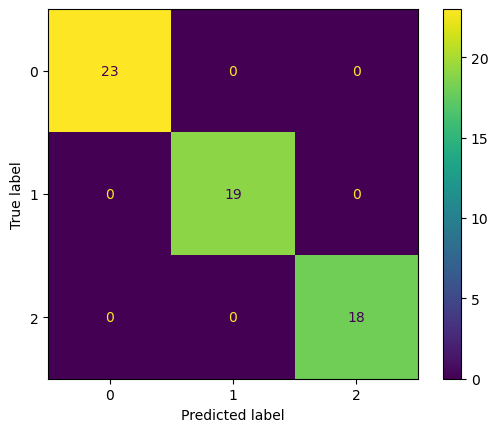

In [18]:
# Visualize confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, predictions, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot()

<Figure size 640x480 with 0 Axes>

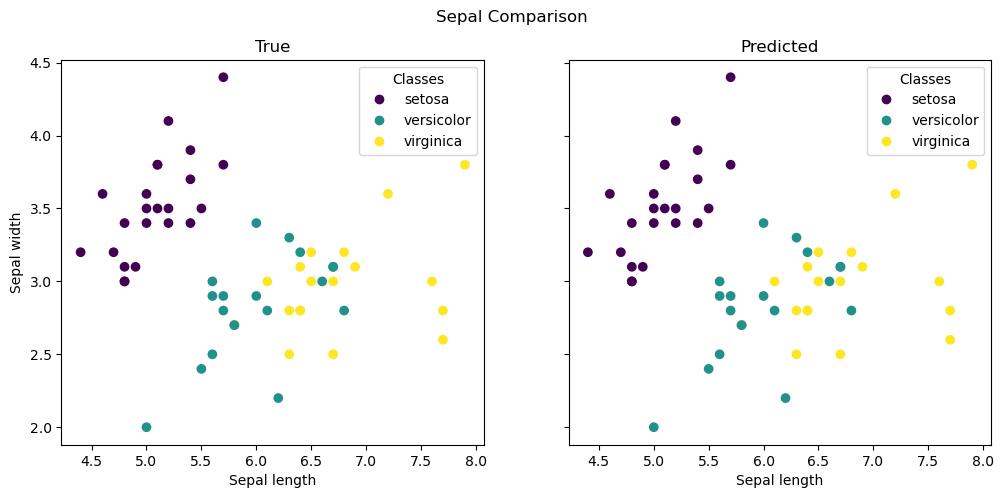

In [19]:
# Plot predictions
plt.figure()
fig,ax =plt.subplots(1,2,figsize=(12,5), sharex=True, sharey=True)

length = ax[0].scatter(x=X_test[:,0], y=X_test[:,1], c=Y_test)
width = ax[1].scatter(x=X_test[:,0], y=X_test[:,1], c=predictions)

ax[0].set_title('True')
ax[1].set_title('Predicted')
ax[0].set_xlabel('Sepal length')
ax[1].set_xlabel('Sepal length')
ax[0].set_ylabel('Sepal width')
fig.suptitle('Sepal Comparison')
handles, labels = length.legend_elements()
legend = ax[0].legend(handles = handles, labels = list(iris.target_names), title="Classes")
legend = ax[1].legend(handles = handles, labels = list(iris.target_names), title="Classes")

plt.show()

<Figure size 640x480 with 0 Axes>

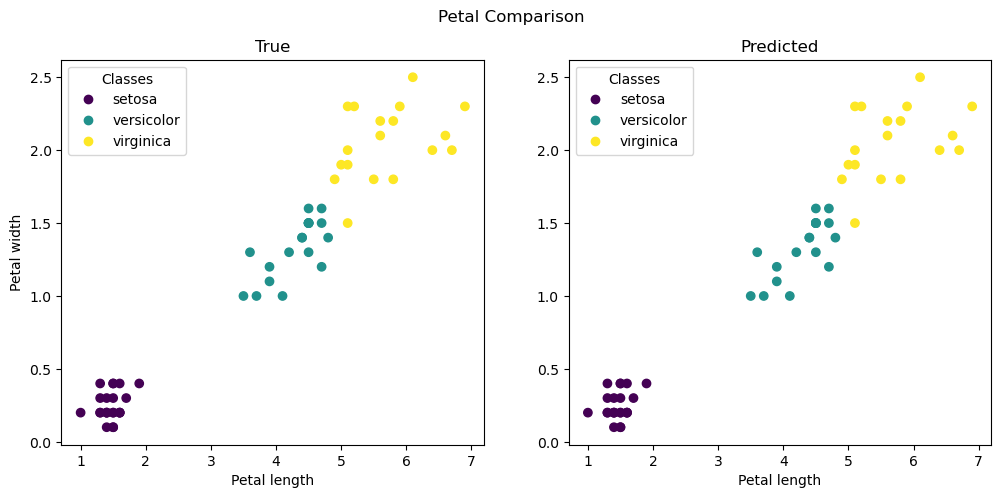

In [20]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(12,5))

length = ax[0].scatter(x=X_test[:,2], y=X_test[:,3], c=Y_test)
width = ax[1].scatter(x=X_test[:,2], y=X_test[:,3], c=predictions)

ax[0].set_title('True')
ax[1].set_title('Predicted')
ax[0].set_xlabel('Petal length')
ax[1].set_xlabel('Petal length')
ax[0].set_ylabel('Petal width')
fig.suptitle('Petal Comparison')
handles, labels = length.legend_elements()
legend = ax[0].legend(handles = handles, labels=list(iris.target_names), title="Classes")
legend = ax[1].legend(handles = handles, labels=list(iris.target_names), title="Classes")

plt.show()